### **Caso de Estudio: Modelo de Red Neuronal para la Predicción de Precios de Viviendas**
**Duracion:(2 Semanas)**  


---

## **1. Business Case Discovery**

### **1.1 Contexto del Negocio y Antecedentes**  
Una importante compañía de envíos ha decidido modernizar su sistema de ruteo de correspondencia, paquetes y encomiendas. Actualmente, el proceso de clasificación se realiza de manera semi-automática y con intervención manual, lo que ocasiona demoras y errores en la entrega.  
El negocio ha identificado que el reconocimiento automático de los dígitos que componen el código postal en los paquetes puede agilizar el proceso y reducir costos operativos, mejorando la satisfacción del cliente.

### **1.2 Objetivo del Proyecto**  
El propósito es desarrollar un sistema de reconocimiento de dígitos basado en un modelo de red neuronal convolucional que:
- Identifique correctamente los dígitos del código postal en imágenes de paquetes.
- Automatice el ruteo y la clasificación en función del código postal.

### **1.4 Métricas de Éxito**  
- **Precisión (Accuracy):** Porcentaje de dígitos reconocidos correctamente en cada imagen.  
- **Tiempo de Inferencia:** Tiempo requerido para procesar cada imagen, clave para aplicaciones en tiempo real.  
- **Número de Parámetros:** Comparación de la eficiencia del modelo, evaluando la complejidad y capacidad de generalización.  

### **1.5 Desafíos y Consideraciones**  
- **Calidad y Variabilidad de las Imágenes:** Diferentes condiciones de iluminación, ángulos y ruido pueden dificultar la clasificación.  
- **Overfitting y Underfitting:** Balancear la complejidad del modelo para que no se adapte excesivamente a las muestras de entrenamiento.  

---

## **2. Data Processing**

### **2.1 Dataset para Entrenamiento**  
Para este caso de estudio, utilizaremos el dataset **MNIST** (Modified National Institute of Standards and Technology), que contiene **70,000 imágenes en escala de grises (28x28 píxeles) de dígitos manuscritos (0-9)**. Este conjunto de datos es ampliamente utilizado para tareas de clasificación de imágenes y servirá como base para entrenar nuestro modelo de reconocimiento de dígitos en códigos postales.  

Los alumnos podrán acceder a este dataset a través de bibliotecas como **TensorFlow/Keras (`tf.keras.datasets.mnist`)** o descargarlo desde plataformas como **Kaggle**.

In [1]:
from tensorflow.keras.datasets import mnist

# Cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Mostrar las dimensiones de los conjuntos de datos
print("Tamaño del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento: (60000, 28, 28) (60000,)
Tamaño del conjunto de prueba: (10000, 28, 28) (10000,)


### **2.2 Análisis Exploratorio y Visualización**  
Para comprender la naturaleza de los datos, el alumno deberá:

- Visualizar múltiples muestras de dígitos en diferentes formatos.
    - Agrupa imágenes por clase y observa si algunos dígitos están representados con mayor frecuencia que otros.

- Utilizar histogramas y diagramas de dispersión para analizar la distribución de las clases.
    - Utiliza histogramas para ver cuántas imágenes hay de cada número (0-9).
    - ¿Hay clases con más imágenes que otras? Si sí, esto podría afectar el entrenamiento del modelo.
    - Si hay desbalance, considera técnicas como oversampling o augmentation focalizado.

- Detectar posibles anomalías o sesgos en la distribución de imágenes.
    - Busca imágenes mal etiquetadas o con baja calidad (dígitos borrosos, con ruido o mal escritos).
    - Errores comunes:
        Imágenes corruptas (píxeles aleatorios).
        Dígitos mal centrados o rotados.
        Etiquetas incorrectas (ej: un "5" etiquetado como "6").
    - Piensa en estrategias para manejar estos datos: ¿Deben ser eliminados o corregidos?


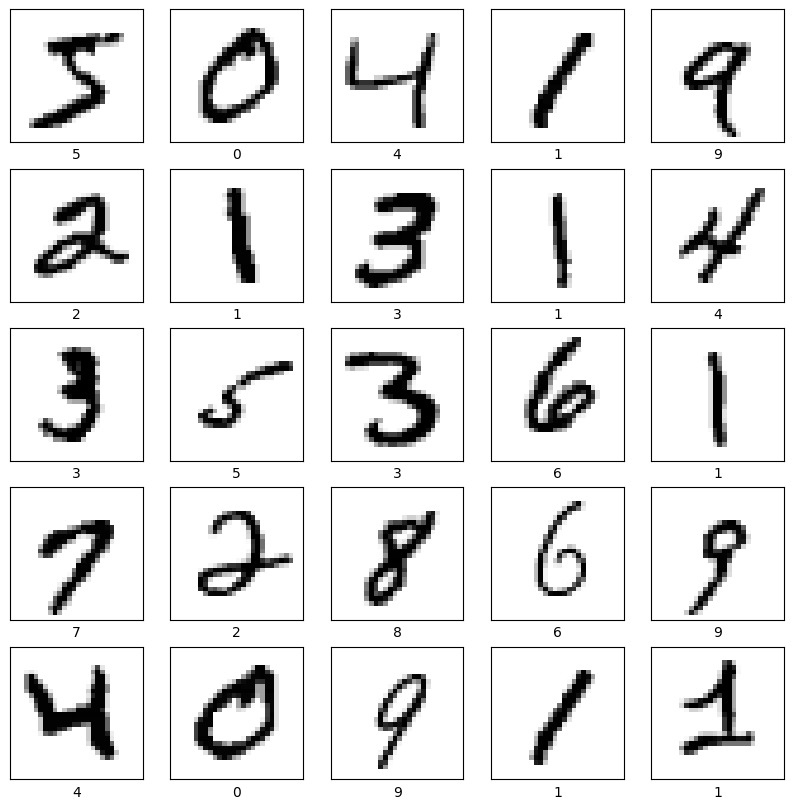

In [2]:
# Mostrar algunas imágenes del dataset de entrenamiento
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Mostrar las primeras 25 imágenes del conjunto de entrenamiento
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### **2.3 Limpieza y Preprocesamiento de Imágenes**  

El dataset **MNIST** ya viene preprocesado en gran medida, pero es importante asegurarse de que los datos estén en el formato adecuado antes de entrenar la red neuronal.  

- **Redimensionamiento y Normalización:** No es necesario cambiar el tamaño de las imágenes, ya que todas tienen una resolución uniforme de **28x28 píxeles**. Sin embargo, los valores de los píxeles están en el rango **[0, 255]**, por lo que se debe normalizar dividiendo por **255** para escalarlos al rango **[0,1]**, lo que ayuda a estabilizar el entrenamiento del modelo.  

- **Aumento de Datos:** Aunque MNIST es un dataset bien equilibrado, agregar **data augmentation** puede mejorar la generalización del modelo. Se recomienda aplicar transformaciones como **rotaciones, traslaciones, zoom y cambios de brillo** para simular variaciones en la escritura de los dígitos y hacer el modelo más robusto.  

- **Conversión de Formatos:** Las imágenes están en escala de grises y se almacenan como matrices NumPy. Para que sean procesadas correctamente por una CNN en Keras/TensorFlow, es necesario asegurarse de que tengan la forma adecuada **(n_samples, 28, 28, 1)**, añadiendo una dimensión de canal (`reshape(-1, 28, 28, 1)`) si es necesario.


In [3]:
# Normalización de los datos
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionar las imágenes para incluir la dimensión del canal
def preprocess_images(images):
    return images.reshape(-1, 28, 28, 1)

x_train = preprocess_images(x_train)
x_test = preprocess_images(x_test)

# Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation = ImageDataGenerator(
    rotation_range=10,  # Rotaciones aleatorias
    width_shift_range=0.1,  # Traslaciones horizontales
    height_shift_range=0.1,  # Traslaciones verticales
    zoom_range=0.1,  # Zoom aleatorio
    brightness_range=[0.8, 1.2]  # Cambios de brillo
)

# Ejemplo de cómo aplicar el aumento de datos a un lote de imágenes
# data_augmentation.flow(x_train, y_train, batch_size=32)

### **2.4 División de Datos: Entrenamiento, Validación y Test**  
- Dividir el dataset en tres conjuntos: entrenamiento (70%), validación (15%) y prueba (15%).  
- Garantizar que cada conjunto mantenga la misma distribución de clases para evitar sesgos en la evaluación. 


In [4]:
print("Tamaño del conjunto de entrenamiento:", x_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", x_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento: (60000, 28, 28, 1) (60000,)
Tamaño del conjunto de prueba: (10000, 28, 28, 1) (10000,)



---
## **3. Model Planning**

### **3.1 Definición del Problema y Enfoque**  
- **Tipo de Problema:** Clasificación de imágenes, donde cada imagen representa un dígito del 0 al 9.  
- **Objetivo:** Lograr una alta precisión en la identificación de dígitos, minimizando errores que puedan afectar el ruteo de paquetes.

### **3.2 Arquitectura de la Red Neuronal Convolucional**  
Se propone diseñar una CNN con al menos:
- **Capas Convolucionales:** Incluir al menos dos capas convolucionales, con filtros incrementando en cantidad, por ejemplo, 32 y 64 filtros respectivamente.  
- **Capas de Pooling:** Tras cada bloque convolucional, aplicar capas de MaxPooling para reducir la dimensionalidad y resaltar las características importantes.  
- **Capas de Activación:** Utilizar funciones de activación ReLU en cada capa oculta para introducir no linealidades.  
- **Capa Final:** Una capa densa (fully connected) que procese la información extraída y una capa de salida con 10 neuronas (una para cada dígito) y activación softmax.


In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Definir la arquitectura de la red neuronal convolucional
model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar las salidas convolucionales
    Flatten(),

    # Capa densa completamente conectada
    Dense(128, activation='relu'),

    # Capa de salida con 10 neuronas y activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Resumen del modelo
model.summary()

c:\Users\sergi\Desktop\MasterAI\GenAI_Dev\repo\ia-generativa-desarrollo\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### **3.3 Estrategia de Mejora y Experimentación**  
El alumno explorará la inclusión de:
- **Capa Adicional de Convolución:** Insertar una nueva capa Conv2D (por ejemplo, con 64 filtros) después de la primera capa de pooling, seguida de una segunda capa de pooling y activación.  
- **Comparación de Modelos:** Evaluar y comparar la cantidad de parámetros, tiempo de entrenamiento y desempeño (accuracy, loss) entre el modelo base y la versión mejorada.
- **Optimización de Hiperparámetros:** Experimentar con distintas tasas de aprendizaje, tamaños de batch y técnicas de regularización (Dropout, L2) para evitar el sobreajuste.

In [6]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

# Definir la arquitectura mejorada de la red neuronal convolucional
improved_model = Sequential([
    # Primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Capa adicional de convolución
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar las salidas convolucionales
    Flatten(),

    # Capa densa completamente conectada con regularización L2 y Dropout
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),

    # Capa de salida con 10 neuronas y activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo con optimizador Adam y tasa de aprendizaje ajustada
improved_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Resumen del modelo mejorado
improved_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 65,354 (255.29 KB)

 Trainable params: 65,354 (255.29 KB)

 Non-trainable params: 0 (0.00 B)

### **3.4 Función de Pérdida y Optimizadores**  
- **Función de Pérdida:** Usar la entropía cruzada categórica (categorical crossentropy) para la clasificación.  
- **Optimizadores:** Probar con optimizadores como Adam y RMSprop para comparar convergencia y estabilidad en el entrenamiento.

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7724 - loss: 0.9642 - val_accuracy: 0.9629 - val_loss: 0.2056
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7724 - loss: 0.9642 - val_accuracy: 0.9629 - val_loss: 0.2056
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9614 - loss: 0.1922 - val_accuracy: 0.9746 - val_loss: 0.1216
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9614 - loss: 0.1922 - val_accuracy: 0.9746 - val_loss: 0.1216
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9700 - loss: 0.1441 - val_accuracy: 0.9789 - val_loss: 0.1046
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9700 - loss: 0.1441 - val_accuracy: 0.9789 - val_loss: 0.1046
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9765 - loss: 0.1159 - val_accuracy: 0.9808 - val_loss: 0.0957
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9765 - loss: 0.115

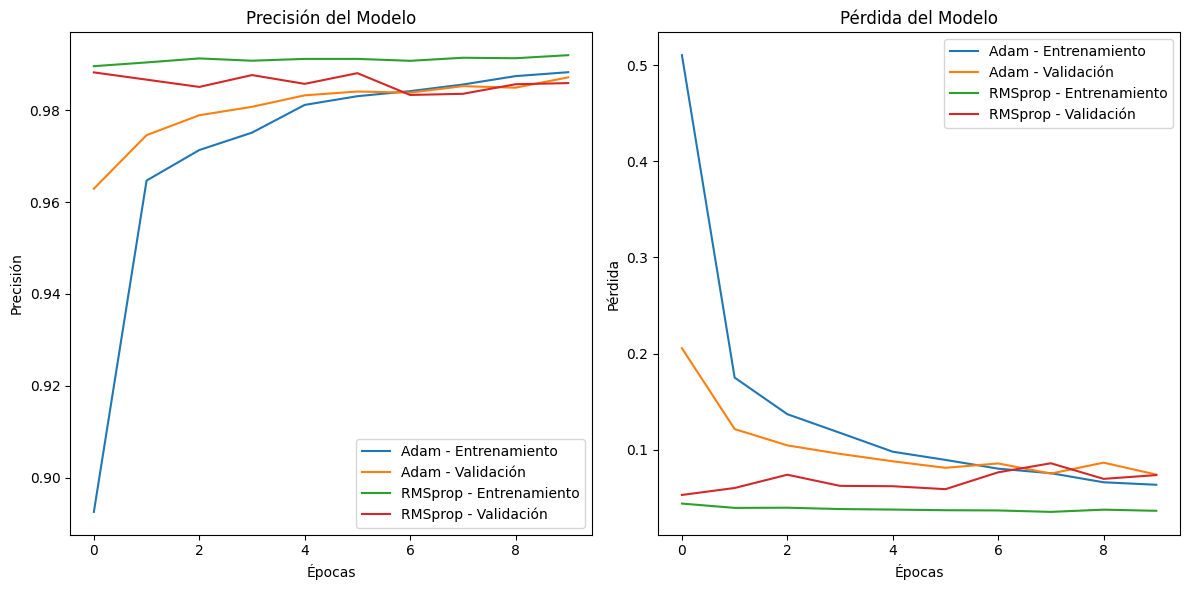

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicción con Adam: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicción con Adam: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Predicción con RMSprop: 7
Predicción con RMSprop: 7


In [7]:
from tensorflow.keras.optimizers import RMSprop

# Compilar el modelo con el optimizador Adam
improved_model.compile(optimizer=Adam(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Entrenar el modelo con Adam
history_adam = improved_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Compilar el modelo con el optimizador RMSprop
improved_model.compile(optimizer=RMSprop(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Entrenar el modelo con RMSprop
history_rmsprop = improved_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

# Comparar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history_adam.history['accuracy'], label='Adam - Entrenamiento')
plt.plot(history_adam.history['val_accuracy'], label='Adam - Validación')
plt.plot(history_rmsprop.history['accuracy'], label='RMSprop - Entrenamiento')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop - Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_adam.history['loss'], label='Adam - Entrenamiento')
plt.plot(history_adam.history['val_loss'], label='Adam - Validación')
plt.plot(history_rmsprop.history['loss'], label='RMSprop - Entrenamiento')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop - Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

# Ejemplo de predicción con el modelo entrenado usando Adam
sample_image = x_test[0].reshape(1, 28, 28, 1)  # Seleccionar una imagen de prueba y redimensionarla
prediction_adam = improved_model.predict(sample_image)
print("Predicción con Adam:", prediction_adam.argmax())

# Compilar el modelo nuevamente con RMSprop para predicción
improved_model.compile(optimizer=RMSprop(learning_rate=0.001),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Ejemplo de predicción con el modelo entrenado usando RMSprop
prediction_rmsprop = improved_model.predict(sample_image)
print("Predicción con RMSprop:", prediction_rmsprop.argmax())

---

## **4. Model Building and Selection**

### **4.1 Diseño e Implementación del Modelo**  
El alumno deberá construir la CNN siguiendo la arquitectura planificada. Se deben considerar:
- **Capas Iniciales:** Capa de entrada adaptada a la forma de las imágenes (por ejemplo, 28x28x1 para imágenes en escala de grises).  
- **Bloques Convolucionales y de Pooling:** Al menos dos bloques, con la incorporación de una capa adicional de convolución en la segunda etapa.  
- **Capa de Flatten y Fully Connected:** Aplanamiento de las salidas convolucionales y conexión a una o varias capas densas.

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Construcción de la CNN basada en el optimizador seleccionado
final_model = Sequential([
    # Capa de entrada y primera capa convolucional
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    # Segunda capa convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Capa adicional de convolución
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Aplanar las salidas convolucionales
    Flatten(),

    # Capa densa completamente conectada
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Capa de salida con 10 neuronas y activación softmax
    Dense(10, activation='softmax')
])

# Compilar el modelo con el optimizador seleccionado (por ejemplo, Adam)
final_model.compile(optimizer=Adam(learning_rate=0.001),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Resumen del modelo
final_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 128,266 (501.04 KB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

### **4.2 Entrenamiento y Validación**  
- **Número de Épocas y Batch Size:** Sugerencia de comenzar con 50-100 épocas y un tamaño de batch de 32 o 64, observando la evolución de la loss y la accuracy.  
- **Monitoreo de Métricas:** Durante el entrenamiento, monitorizar tanto la pérdida como la precisión en los conjuntos de entrenamiento y validación para detectar signos de sobreajuste o underfitting.
- **Estrategia de Early Stopping:** Considerar el uso de técnicas de early stopping basadas en la validación para evitar entrenar de más.

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8133 - loss: 0.5670 - val_accuracy: 0.9768 - val_loss: 0.0756
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8133 - loss: 0.5670 - val_accuracy: 0.9768 - val_loss: 0.0756
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9715 - loss: 0.0939 - val_accuracy: 0.9797 - val_loss: 0.0695
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9715 - loss: 0.0939 - val_accuracy: 0.9797 - val_loss: 0.0695
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9813 - loss: 0.0640 - val_accuracy: 0.9832 - val_loss: 0.0522
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9813 - loss: 0.0640 - val_accuracy: 0.9832 - val_loss: 0.0522
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9860 - loss: 0.0470 - val_accuracy: 0.9820 - val_loss: 0.0582
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9860 - loss: 0.047

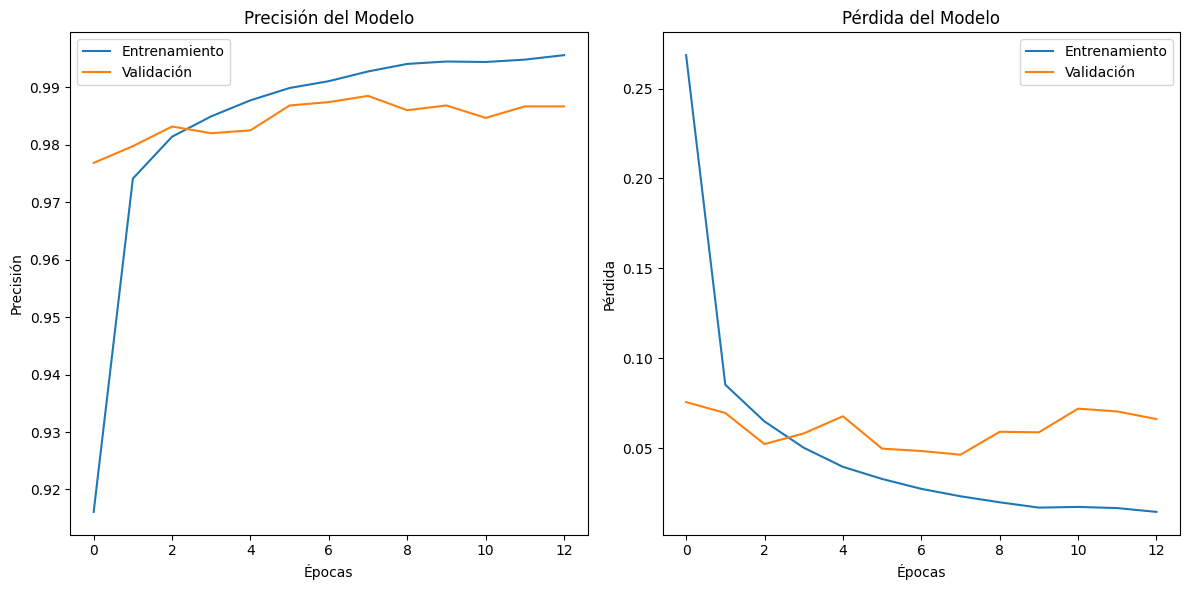

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

# Configurar Early Stopping para detener el entrenamiento si no hay mejora en la validación
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo final
history_final = final_model.fit(
    x_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Graficar la evolución de la pérdida y precisión
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history_final.history['accuracy'], label='Entrenamiento')
plt.plot(history_final.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_final.history['loss'], label='Entrenamiento')
plt.plot(history_final.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()

### **4.3 Experimentación y Comparación de Modelos**  
- **Modelo Base vs. Modelo Mejorado:**  
  - Insertar la capa adicional de convolución (con 64 filtros) después del primer MaxPooling y antes del segundo bloque de pooling.
  - Evaluar el cambio en el número total de parámetros, tiempo de entrenamiento y precisión en el conjunto de validación.
- **Análisis de Resultados:**  
  - ¿El modelo mejorado incrementa la precisión de forma significativa?
  - ¿Cómo afecta la nueva arquitectura al tiempo de entrenamiento y al número de parámetros?  
  - Reflexionar sobre el impacto del aumento de complejidad en términos de capacidad de generalización.

In [10]:
# Comparar modelos: Modelo Base vs. Modelo Mejorado
import time

# Evaluar el modelo base
start_time = time.time()
history_base = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)
base_training_time = time.time() - start_time
base_params = model.count_params()

# Evaluar el modelo mejorado
start_time = time.time()
history_improved = improved_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)
improved_training_time = time.time() - start_time
improved_params = improved_model.count_params()

# Evaluar el modelo final
start_time = time.time()
history_final = final_model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=32)
final_training_time = time.time() - start_time
final_params = final_model.count_params()

# Comparar resultados
print("\n--- Comparación de Modelos ---")
print(f"Modelo Base: Parámetros = {base_params}, Tiempo de Entrenamiento = {base_training_time:.2f} segundos, Precisión = {max(history_base.history['val_accuracy']):.4f}")
print(f"Modelo Mejorado: Parámetros = {improved_params}, Tiempo de Entrenamiento = {improved_training_time:.2f} segundos, Precisión = {max(history_improved.history['val_accuracy']):.4f}")
print(f"Modelo Final: Parámetros = {final_params}, Tiempo de Entrenamiento = {final_training_time:.2f} segundos, Precisión = {max(history_final.history['val_accuracy']):.4f}")

# Reflexión sobre los resultados
print("\n--- Reflexión ---")
if max(history_improved.history['val_accuracy']) > max(history_base.history['val_accuracy']):
    print("El modelo mejorado incrementa la precisión de forma significativa en comparación con el modelo base.")
else:
    print("El modelo mejorado no incrementa la precisión de forma significativa en comparación con el modelo base.")

if max(history_final.history['val_accuracy']) > max(history_improved.history['val_accuracy']):
    print("El modelo final ofrece la mejor precisión entre los modelos evaluados.")
else:
    print("El modelo final no supera al modelo mejorado en términos de precisión.")

print("El aumento en el número de parámetros y el tiempo de entrenamiento debe ser considerado en función de los recursos disponibles y la capacidad de generalización del modelo.")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8988 - loss: 0.3253 - val_accuracy: 0.9797 - val_loss: 0.0672
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8988 - loss: 0.3253 - val_accuracy: 0.9797 - val_loss: 0.0672
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9847 - loss: 0.0499 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9847 - loss: 0.0499 - val_accuracy: 0.9877 - val_loss: 0.0435
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9896 - val_loss: 0.0375
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9897 - loss: 0.0331 - val_accuracy: 0.9896 - val_loss: 0.0375
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9879 - val_loss: 0.0402
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9924 - loss: 0.0240 

### **4.4 Validación Cruzada y Selección Final**  
- Aplicar técnicas de validación cruzada (por ejemplo, K-Fold con k=5) para garantizar la robustez del modelo.
- Comparar resultados y seleccionar la configuración final basada en métricas cuantitativas y cualitativas.


In [11]:
from sklearn.model_selection import KFold
import numpy as np

# Configurar K-Fold Cross-Validation
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Almacenar métricas de cada fold
fold_accuracies = []

for train_index, val_index in kf.split(x_train):
    # Dividir los datos en entrenamiento y validación
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Crear un nuevo modelo para cada fold
    kfold_model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    # Compilar el modelo
    kfold_model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

    # Entrenar el modelo
    history = kfold_model.fit(x_train_fold, y_train_fold,
                             epochs=10,
                             batch_size=32,
                             validation_data=(x_val_fold, y_val_fold),
                             verbose=0)

    # Evaluar el modelo en el conjunto de validación
    val_accuracy = max(history.history['val_accuracy'])
    fold_accuracies.append(val_accuracy)

    print(f"Fold completado con precisión de validación: {val_accuracy:.4f}")

# Calcular métricas finales
mean_accuracy = np.mean(fold_accuracies)
std_accuracy = np.std(fold_accuracies)

print(f"\nPrecisión promedio en {k} folds: {mean_accuracy:.4f} ± {std_accuracy:.4f}")

Fold completado con precisión de validación: 0.9913
Fold completado con precisión de validación: 0.9902
Fold completado con precisión de validación: 0.9902
Fold completado con precisión de validación: 0.9909
Fold completado con precisión de validación: 0.9909
Fold completado con precisión de validación: 0.9893
Fold completado con precisión de validación: 0.9893
Fold completado con precisión de validación: 0.9900

Precisión promedio en 5 folds: 0.9904 ± 0.0007
Fold completado con precisión de validación: 0.9900

Precisión promedio en 5 folds: 0.9904 ± 0.0007


In [12]:
# Comparar la precisión promedio del modelo K-Fold con los modelos anteriores
print("\n--- Comparación de Modelos ---")
print(f"Modelo Base: Precisión = {max(history_base.history['val_accuracy']):.4f}")
print(f"Modelo Mejorado: Precisión = {max(history_improved.history['val_accuracy']):.4f}")
print(f"Modelo Final: Precisión = {max(history_final.history['val_accuracy']):.4f}")
print(f"Modelo K-Fold: Precisión Promedio = {mean_accuracy:.4f} ± {std_accuracy:.4f}")

# Reflexión sobre los resultados
if mean_accuracy > max(history_final.history['val_accuracy']):
    print("El modelo K-Fold muestra una precisión promedio superior al modelo final.")
else:
    print("El modelo final supera al modelo K-Fold en términos de precisión promedio.")


--- Comparación de Modelos ---
Modelo Base: Precisión = 0.9898
Modelo Mejorado: Precisión = 0.9870
Modelo Final: Precisión = 0.9882
Modelo K-Fold: Precisión Promedio = 0.9904 ± 0.0007
El modelo K-Fold muestra una precisión promedio superior al modelo final.


## **5. Presentación de Resultados**

### **5.1 Análisis Cuantitativo de las Métricas**  
El alumno deberá presentar los resultados obtenidos en función de:
- **Precisión (Accuracy):** Porcentaje de dígitos correctamente clasificados.  
- **Loss y Entropía Cruzada:** Evolución durante el entrenamiento y validación.  
- **Comparación de Modelos:** Resultados del modelo base versus el modelo con capa adicional, incluyendo número de parámetros y tiempos de entrenamiento.

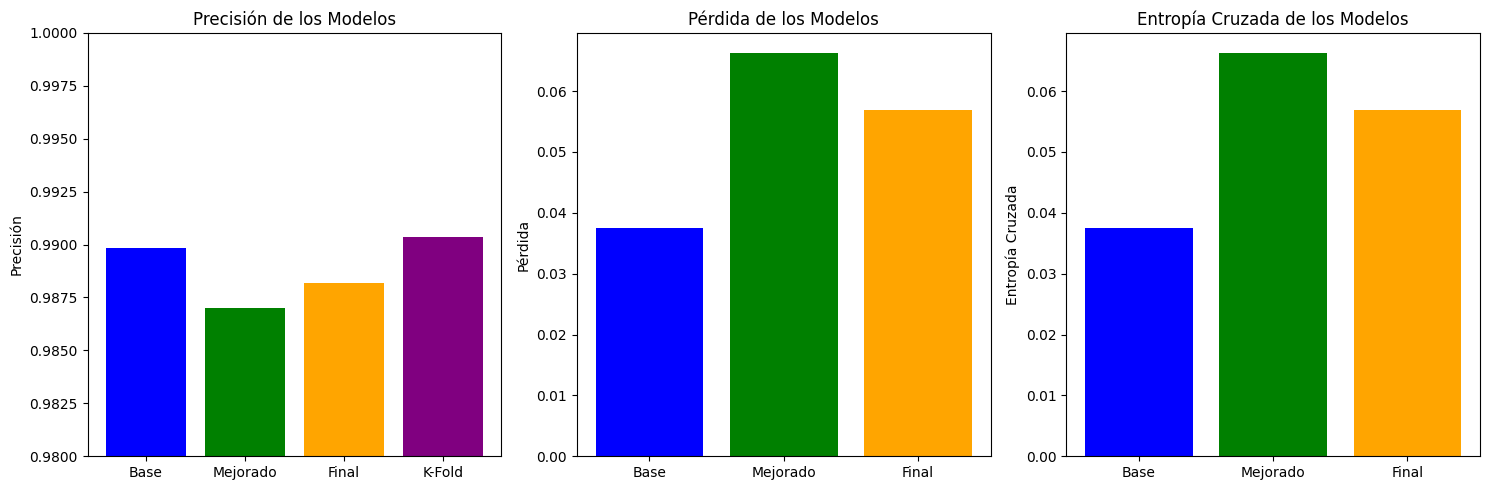

In [13]:
import matplotlib.pyplot as plt

# Configurar las métricas de los modelos
models = ['Base', 'Mejorado', 'Final', 'K-Fold']
accuracies = [
    max(history_base.history['val_accuracy']),
    max(history_improved.history['val_accuracy']),
    max(history_final.history['val_accuracy']),
    mean_accuracy
]
losses = [
    min(history_base.history['val_loss']),
    min(history_improved.history['val_loss']),
    min(history_final.history['val_loss']),
    None  # K-Fold no tiene una única pérdida
]

# Crear las gráficas
plt.figure(figsize=(15, 5))

# Gráfica de precisión
plt.subplot(1, 3, 1)
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'purple'])
plt.title('Precisión de los Modelos')
plt.ylabel('Precisión')
plt.ylim(0.98, 1.0)

# Gráfica de pérdida
plt.subplot(1, 3, 2)
plt.bar(models[:-1], losses[:-1], color=['blue', 'green', 'orange'])
plt.title('Pérdida de los Modelos')
plt.ylabel('Pérdida')

# Gráfica de entropía cruzada (si aplica)
# Nota: Aquí se asume que la entropía cruzada es equivalente a la pérdida para estos modelos.
plt.subplot(1, 3, 3)
plt.bar(models[:-1], losses[:-1], color=['blue', 'green', 'orange'])
plt.title('Entropía Cruzada de los Modelos')
plt.ylabel('Entropía Cruzada')

plt.tight_layout()
plt.show()

### **5.2 Visualización de Resultados**

- **Curvas de Entrenamiento y Validación:** Graficar la evolución de la pérdida y precisión a lo largo de las épocas para detectar sobreajuste o convergencia inadecuada.
- **Matriz de Confusión:** Visualizar la distribución de aciertos y errores entre las 10 clases para identificar dígitos que podrían confundirse.
- **Análisis de Errores:** Mostrar ejemplos de imágenes mal clasificadas e investigar las posibles causas (calidad de imagen, ambigüedad, etc.).

--- Base ---


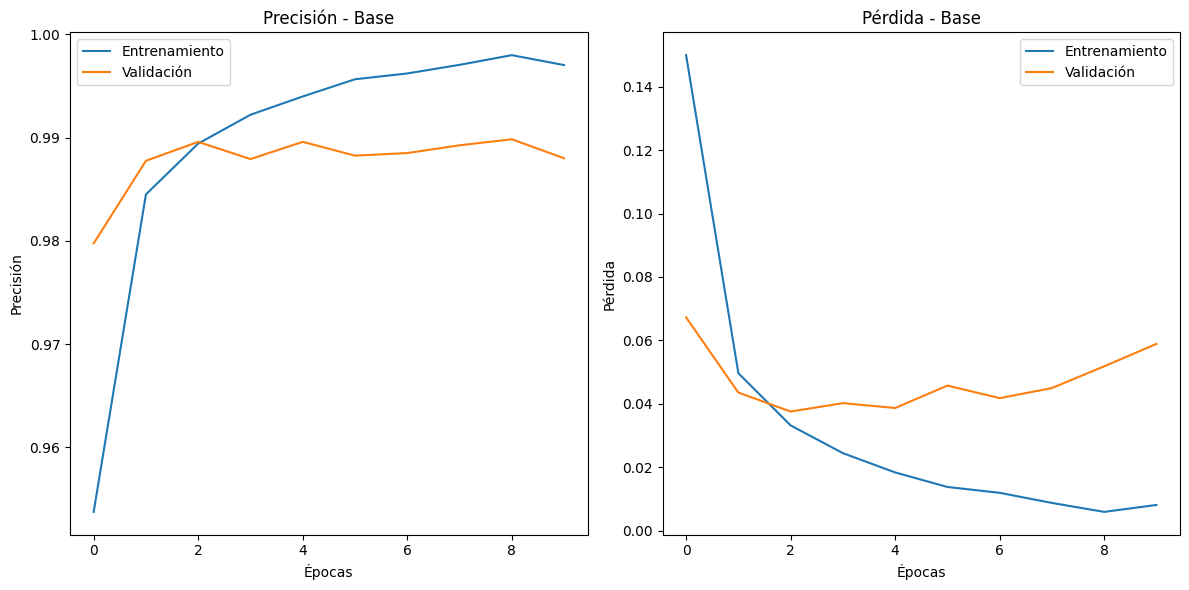

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


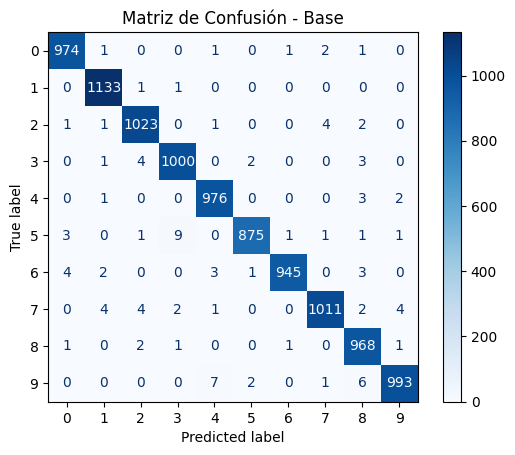

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Número de errores en Base: 102Número de errores en Base: 102



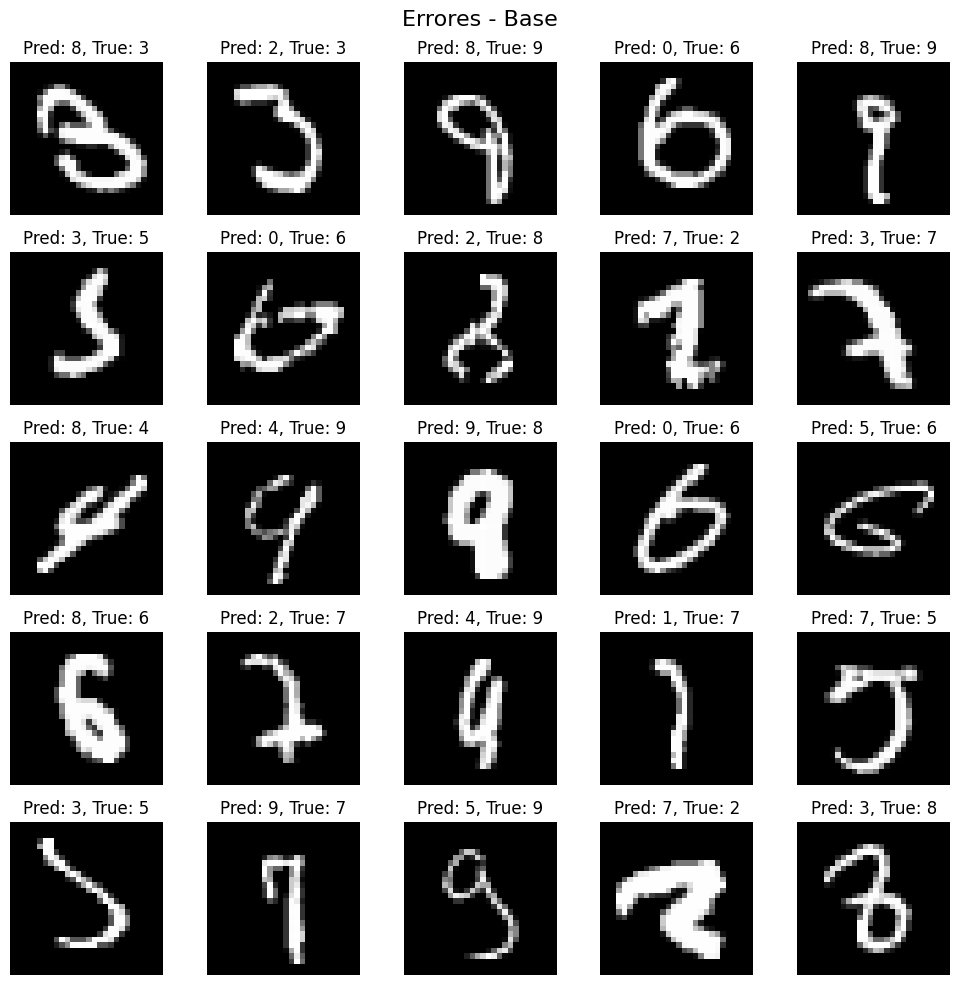

--- Improved ---


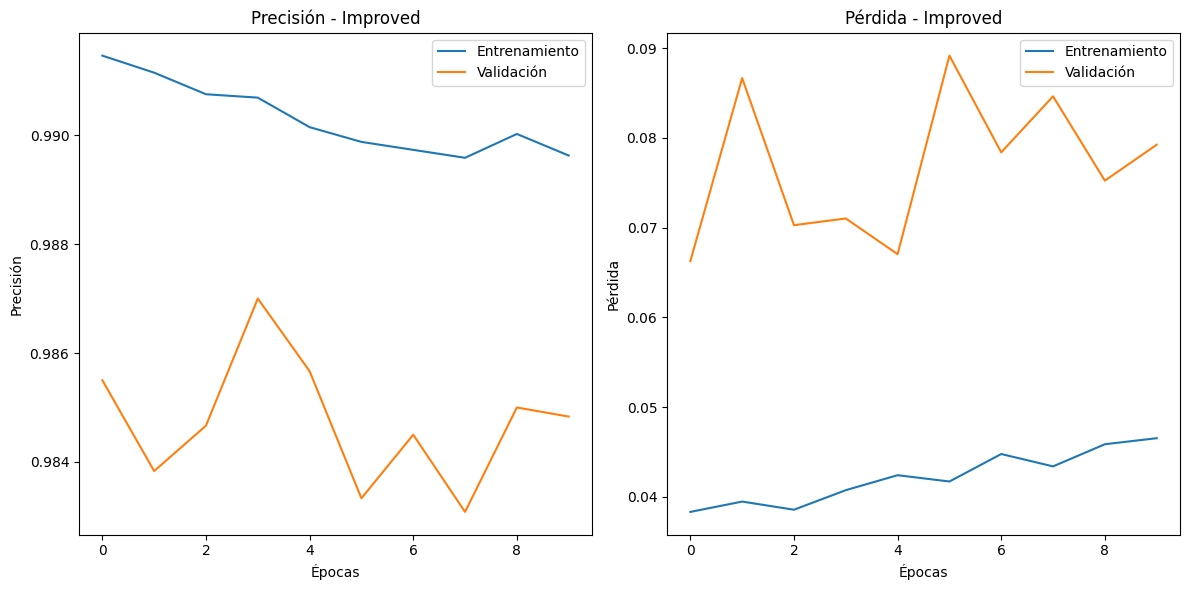

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


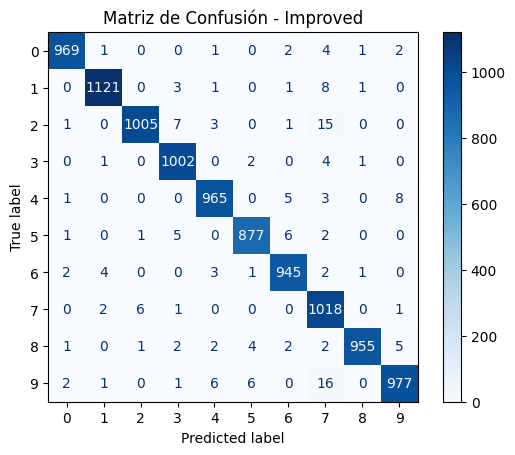

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Número de errores en Improved: 166
Número de errores en Improved: 166


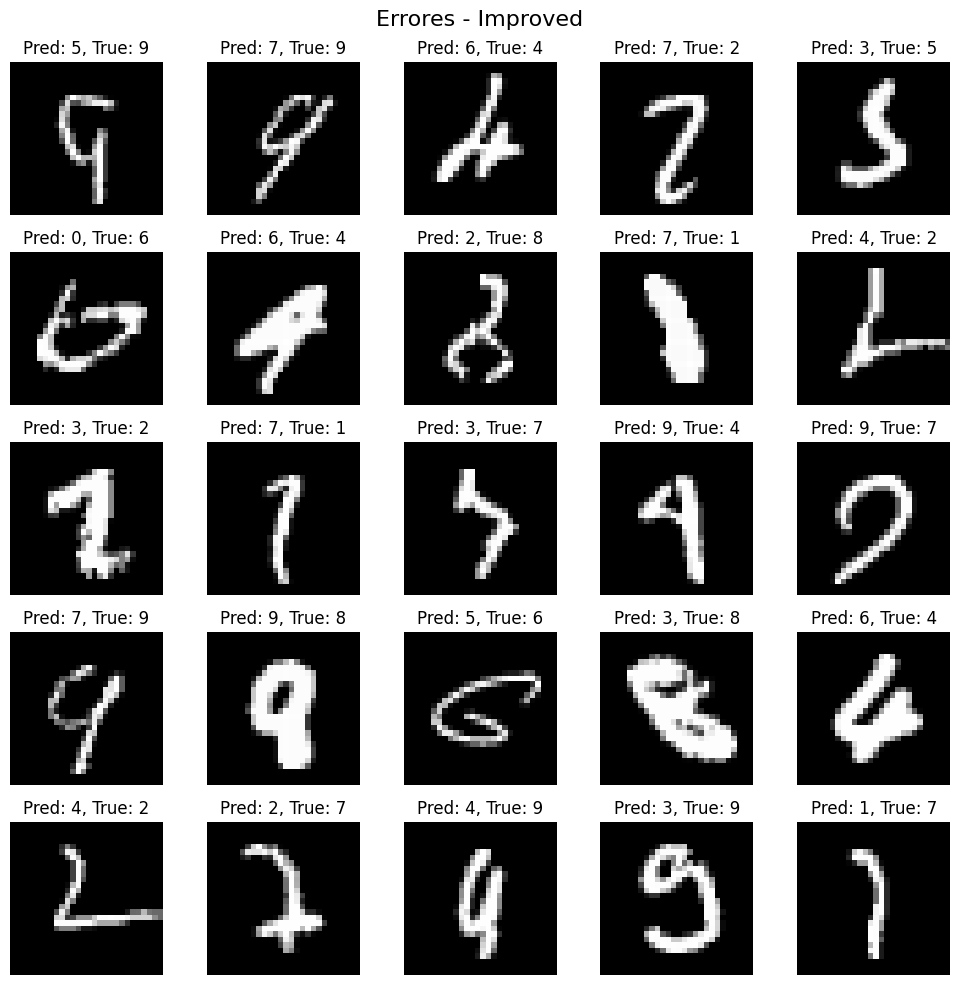

--- Final ---


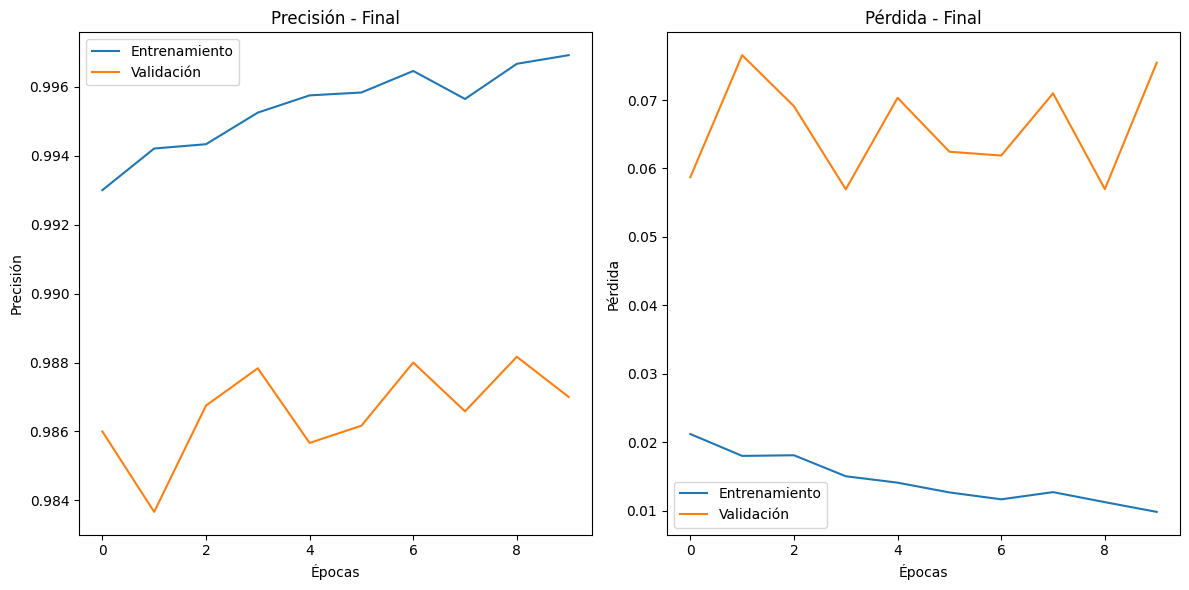

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


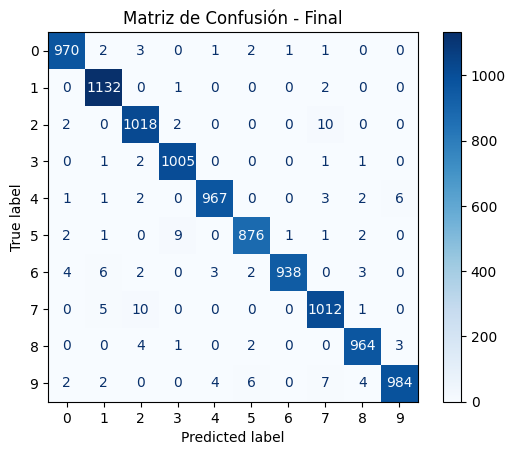

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Número de errores en Final: 134
Número de errores en Final: 134


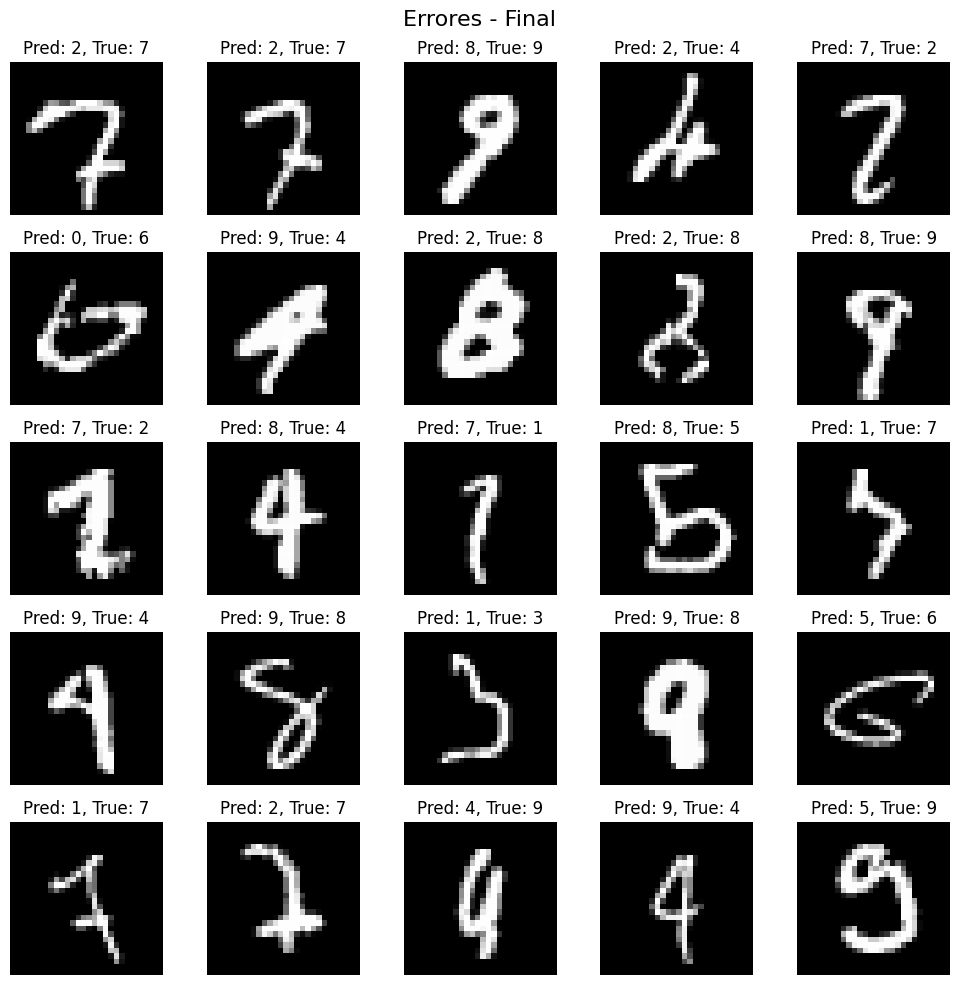

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Función para graficar curvas de entrenamiento y validación
def plot_training_curves(history, model_name):
    plt.figure(figsize=(12, 6))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title(f'Precisión - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title(f'Pérdida - {model_name}')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Función para mostrar la matriz de confusión
def plot_confusion_matrix(model, x_test, y_test, model_name):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.show()

# Función para analizar errores
def analyze_errors(model, x_test, y_test, model_name):
    y_pred = np.argmax(model.predict(x_test), axis=1)
    errors = np.where(y_pred != y_test)[0]

    print(f'Número de errores en {model_name}: {len(errors)}')

    # Mostrar ejemplos de errores
    plt.figure(figsize=(10, 10))
    for i, error_idx in enumerate(errors[:25]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(x_test[error_idx].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {y_pred[error_idx]}, True: {y_test[error_idx]}')
        plt.axis('off')
    plt.suptitle(f'Errores - {model_name}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualización para cada modelo
models = {
    'Base': model,
    'Improved': improved_model,
    'Final': final_model
}

for model_name, model_instance in models.items():
    print(f'--- {model_name} ---')
    plot_training_curves(eval(f'history_{model_name.lower()}'), model_name)
    plot_confusion_matrix(model_instance, x_test, y_test, model_name)
    analyze_errors(model_instance, x_test, y_test, model_name)

### **5.3 Comparativa y Reflexión Crítica**  
- Discutir si la incorporación de la nueva capa convolucional ha mejorado la capacidad del modelo en términos de precisión y robustez.
- Analizar la relación entre el número de parámetros, el tiempo de entrenamiento y la eficiencia en la inferencia.
- Reflexionar sobre posibles mejoras adicionales, como la inclusión de más técnicas de regularización o ajustes en la arquitectura de la red.

---

## **6. Deployment**

### **6.1 Serialización y Almacenamiento del Modelo**  
- **Guardado del Modelo:** El alumno deberá guardar el modelo final en un formato adecuado (por ejemplo, `.h5` o `.keras`) para facilitar su reutilización.

In [15]:
# Guardar el modelo final en formato .keras
model.save('image_model.keras')
print("Modelo guardado como 'image_model.keras'")

Modelo guardado como 'image_model.keras'


### **6.2 Desarrollo de una API para Inferencia**  
- **Implementación de un Servicio Web:** Crear un endpoint (por ejemplo, utilizando Flask o FastAPI) que reciba imágenes de paquetes y devuelva la predicción del dígito.  
- **Optimización para Producción:** Asegurarse de que el servicio se ejecute de manera eficiente, con tiempos de respuesta mínimos, y que pueda ser escalado horizontalmente en caso de alta demanda.

### **6.3 Pruebas y Validación en Entorno Real**  
- **Pruebas de Integración:** Realizar pruebas con imágenes reales de paquetes para evaluar la robustez del modelo en condiciones operativas.

---

### **Conclusión**  
La problemática del reconocimiento de dígitos en códigos postales no solo refuerza el conocimiento en redes neuronales convolucionales, sino que también invita a explorar la importancia de la experimentación, la validación y la integración del sistema en un flujo de trabajo productivo. Se espera que cada alumno justifique sus elecciones, documente su proceso y proponga mejoras basadas en sus hallazgos experimentales.